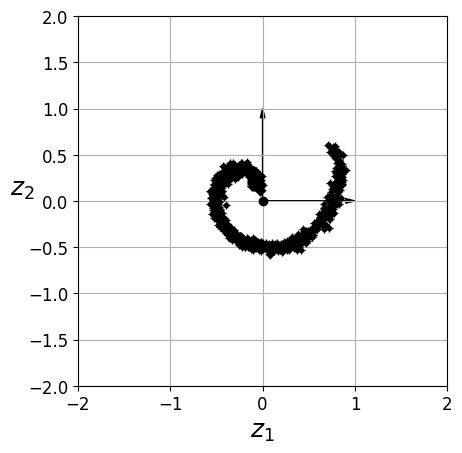

In [ ]:
# Commented out IPython magic to ensure Python compatibility.
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
# %matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

np.random.seed(4)
m = 1000
noise = 0.1

angles = np.random.rand(m) * random.uniform(0,2*np.pi)
X = np.empty((m, 3))
X[:, 0] = angles/6.28*np.cos(angles) + noise * np.random.randn(m)  * random.gauss(0,1) 
X[:, 1] = angles/6.28*np.sin(angles) + noise * np.random.randn(m)  * random.gauss(0,1) 
X[:, 2] =  noise * np.random.randn(m)* random.gauss(0,1)


from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)


fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

ax.plot(X2D[:, 0], X2D[:, 1], "k+")
ax.plot(X2D[:, 0], X2D[:, 1], "k.")
ax.plot([0], [0], "ko")
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.set_xlabel("$z_1$", fontsize=18)
ax.set_ylabel("$z_2$", fontsize=18, rotation=0)
ax.axis([-2, 2, -2, 2])
ax.grid(True)
plt.show()

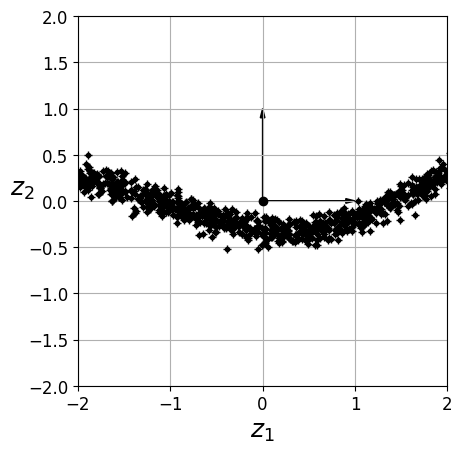

In [ ]:
# Commented out IPython magic to ensure Python compatibility.
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
# %matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

np.random.seed(4)
m = 1000
noise = 0.1

angles = np.random.rand(m) * random.uniform(0,2*np.pi)
X = np.empty((m, 3))
X[:, 0] = angles/6.28*np.cos(angles) + noise * np.random.randn(m)  * random.gauss(0,1)
X[:, 1] = angles/6.28*np.sin(angles) + noise * np.random.randn(m)  * random.gauss(0,1)
X[:, 2] =  angles*1 + noise * np.random.randn(m)* random.gauss(0,1)


from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)


fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

ax.plot(X2D[:, 0], X2D[:, 1], "k+")
ax.plot(X2D[:, 0], X2D[:, 1], "k.")
ax.plot([0], [0], "ko")
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.set_xlabel("$z_1$", fontsize=18)
ax.set_ylabel("$z_2$", fontsize=18, rotation=0)
ax.axis([-2, 2, -2, 2])
ax.grid(True)
plt.show()

In [2]:
#HW8_2
# This example is John Gutag's book
# the code is used to create clusters
# first we generate two cluster with mean and sigma
# second we apply k means cluster
# for simplicity we only use two clusters but the idea can be generalized
# the original code is written in class and object-oriented
# here we use more procedure type programming 

import random
import pandas as pd

x1_record=[]
x2_record=[]




x1=0.0
x2=0.0
y1=0.0
y2=0.0
number_sample=30
#generate two clusters decorated with gaussian noise
for i in range(number_sample):
    x1=random.gauss(0,0.6) #create random number gauss (mean, sigma)
    x2=random.gauss(0,0.6)
    x1_record.append(float(x1))
    x2_record.append(float(x2))
for i in range(number_sample):
    y1= 1.0+random.gauss(0,0.6)
    y2= 1.0+random.gauss(0,0.6)
    x1_record.append(float(y1))
    x2_record.append(float(y2))

number = len(x1_record)
print(number)
#choose two cluster
cluster1= random.choice(range(0,number))
cluster2= random.choice(range(0,number))

centroid1x= x1_record[cluster1]
centroid1y= x2_record[cluster1]
centroid2x= x1_record[cluster2]
centroid2y= x2_record[cluster2]
print('initial choice',round(centroid1x,3), round(centroid1y,3), round(centroid2x,3), round(centroid2y,3)) 

index=[]
for j in range(number):
    index.append('0') # create a zero index tthis index record which cluster
                        #the data point is associated with

#run over all the sample and compute and compare the distance
for j in range(number):
    distance_to_cluster1= (centroid1x-x1_record[j])**2+(centroid1y-x2_record[j])**2
    distance_to_cluster2= (centroid2x-x1_record[j])**2+(centroid2y-x2_record[j])**2
    if distance_to_cluster1>distance_to_cluster2:
        index[j]=2
    else:
        index[j]=1

centroid_1_x=0.0  # index rule index for cluster
centroid_1_y=0.0
centroid_2_x=0.0
centroid_2_y=0.0
for iteration in range(10):
    sum_1_x=0.0
    sum_1_y=0.0
    sum_2_x=0.0
    sum_2_y=0.0
    count_1=0
    count_2=0
    for j in range(number):
        if index[j]==1:
            sum_1_x=sum_1_x+x1_record[j]
            sum_1_y=sum_1_y+x2_record[j]
            count_1=count_1+1
        elif index[j]==2:
            sum_2_x=sum_2_x+x1_record[j]
            sum_2_y=sum_2_y+x2_record[j]
            count_2=count_2+1
        else:
            print('error index') #for trouble shooting
    centroid_1_x=sum_1_x/count_1
    centroid_1_y=sum_1_y/count_1
    centroid_2_x=sum_2_x/count_2
    centroid_2_y=sum_2_y/count_2
    print('step', iteration, '1 x',round(centroid_1_x,3), '1 y',round(centroid_1_y,3),'2 x',round(centroid_2_x,3),'2 y',round(centroid_2_y,3)) 

    for j in range(number):
        distance_to_cluster1= (centroid_1_x-x1_record[j])**2+(centroid_1_y-x2_record[j])**2
        distance_to_cluster2= (centroid_2_x-x1_record[j])**2+(centroid_2_y-x2_record[j])**2
        if distance_to_cluster1>distance_to_cluster2:
            index[j]=2
        else:
            index[j]=1                   
df = pd.DataFrame(columns=['sample', 'x1', 'x2'])
for j in range(number):
    df = df.append({"sample": j+1 , "x1":round(x1_record[j],3), "x2":round(x2_record[j],3)},ignore_index=True)
    print( 'sample #', j, round(x1_record[j],3),round(x2_record[j],3))

df.to_csv('/content/drive/MyDrive/HW8_2.csv', index=False)

60
initial choice 0.525 0.191 2.167 0.168
step 0 1 x 0.36 1 y 0.439 2 x 1.632 2 y 0.741
step 1 1 x 0.196 1 y 0.276 2 x 1.388 2 y 0.93
step 2 1 x 0.112 1 y 0.11 2 x 1.223 2 y 0.997
step 3 1 x 0.078 1 y -0.024 2 x 1.109 2 y 1.013
step 4 1 x 0.074 1 y -0.058 2 x 1.079 2 y 1.011
step 5 1 x 0.074 1 y -0.058 2 x 1.079 2 y 1.011
step 6 1 x 0.074 1 y -0.058 2 x 1.079 2 y 1.011
step 7 1 x 0.074 1 y -0.058 2 x 1.079 2 y 1.011
step 8 1 x 0.074 1 y -0.058 2 x 1.079 2 y 1.011
step 9 1 x 0.074 1 y -0.058 2 x 1.079 2 y 1.011
sample # 0 -0.037 0.018
sample # 1 -1.83 -1.017
sample # 2 0.525 0.191
sample # 3 -0.086 -0.343
sample # 4 0.816 0.061
sample # 5 0.206 0.162
sample # 6 0.319 -0.087
sample # 7 -0.071 0.513
sample # 8 -0.466 -0.381
sample # 9 0.915 -0.551
sample # 10 -0.273 0.602
sample # 11 -0.489 -0.131
sample # 12 1.122 0.586
sample # 13 0.185 0.798
sample # 14 1.001 0.856
sample # 15 0.36 1.064
sample # 16 -0.028 -0.239
sample # 17 0.204 -0.716
sample # 18 0.105 0.689
sample # 19 0.217 -0.989

<ipython-input-2-94626c3b0fcb>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"sample": j+1 , "x1":round(x1_record[j],3), "x2":round(x2_record[j],3)},ignore_index=True)
<ipython-input-2-94626c3b0fcb>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"sample": j+1 , "x1":round(x1_record[j],3), "x2":round(x2_record[j],3)},ignore_index=True)
<ipython-input-2-94626c3b0fcb>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"sample": j+1 , "x1":round(x1_record[j],3), "x2":round(x2_record[j],3)},ignore_index=True)
<ipython-input-2-94626c3b0fcb>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

 28 0.248 1.349
sample # 29 0.246 0.604
sample # 30 1.501 -0.233
sample # 31 1.639 -0.049
sample # 32 0.849 1.021
sample # 33 1.485 0.731
sample # 34 0.476 1.439
sample # 35 0.97 1.326
sample # 36 1.621 0.491
sample # 37 2.167 0.168
sample # 38 1.169 1.153
sample # 39 1.956 1.343
sample # 40 1.123 0.212
sample # 41 1.239 2.247
sample # 42 0.183 -0.18
sample # 43 0.77 0.7
sample # 44 1.429 1.186
sample # 45 0.855 0.411
sample # 46 0.989 1.687
sample # 47 1.41 1.174
sample # 48 0.656 1.218
sample # 49 -0.164 0.886
sample # 50 1.701 0.878
sample # 51 0.186 0.952
sample # 52 0.012 1.644
sample # 53 1.649 1.302
sample # 54 0.667 1.374
sample # 55 0.952 0.775
sample # 56 0.623 1.564
sample # 57 1.242 1.606
sample # 58 0.061 0.072
sample # 59 1.389 1.155


<ipython-input-2-94626c3b0fcb>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"sample": j+1 , "x1":round(x1_record[j],3), "x2":round(x2_record[j],3)},ignore_index=True)
<ipython-input-2-94626c3b0fcb>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"sample": j+1 , "x1":round(x1_record[j],3), "x2":round(x2_record[j],3)},ignore_index=True)
<ipython-input-2-94626c3b0fcb>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"sample": j+1 , "x1":round(x1_record[j],3), "x2":round(x2_record[j],3)},ignore_index=True)
<ipython-input-2-94626c3b0fcb>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

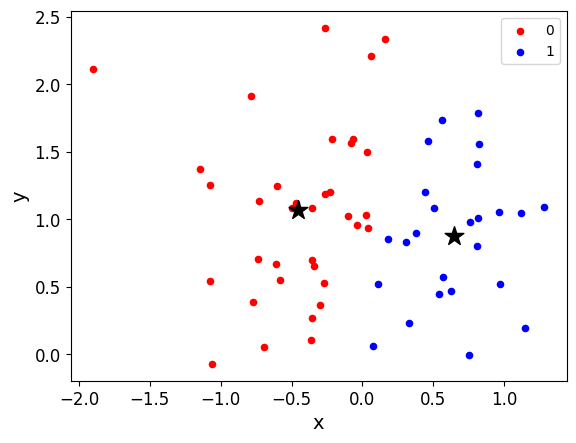

In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the true cluster centers
center_true = np.array([[0, 1.0], [0, 1.0]])

# Initialize the estimated cluster centers randomly
center_est = np.array([[random.uniform(-1, 1), random.uniform(-1, 1)], [random.uniform(-1, 1), random.uniform(-1, 1)]])

# Generate N=60 sample points (30 for each cluster)
N = 60
X = np.zeros((N, 2))
for i in range(N):
    if i < N//2:
        X[i, 0] = random.gauss(center_true[0, 0], 0.6)
        X[i, 1] = random.gauss(center_true[0, 1], 0.6)
    else:
        X[i, 0] = random.gauss(center_true[1, 0], 0.6)
        X[i, 1] = random.gauss(center_true[1, 1], 0.6)

# Run k-means for 10 iterations
K = 2
for iteration in range(10):
    # Assign each point to the nearest cluster center
    distances = np.zeros((N, K))
    for i in range(N):
        for j in range(K):
            distances[i, j] = np.linalg.norm(X[i] - center_est[j])
    labels = np.argmin(distances, axis=1)

    # Update the cluster centers
    for j in range(K):
        center_est[j] = np.mean(X[labels == j], axis=0)

# Plot the sample points and the estimated cluster centers in Excel
df = pd.DataFrame({'x': X[:, 0], 'y': X[:, 1], 'label': labels})
fig, ax = plt.subplots()
colors = {0: 'red', 1: 'blue'}
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.scatter(center_est[:, 0], center_est[:, 1], marker='*', s=200, c='black')
plt.show()
